# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)
#mnist var is what we are going to use to get our images.

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

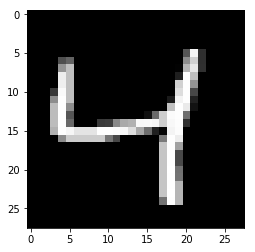

In [11]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')
#print (img)

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [10]:
#print (mnist.train.images.shape[1])

60000


In [17]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
#print (mnist.train.images.shape) #784 = 28x28
img_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, [None, img_size], name='inputs')
targets_ = tf.placeholder(tf.float32, [None, img_size], name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, img_size, activation=None)

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [18]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [19]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6947
Epoch: 1/20... Training loss: 0.6911
Epoch: 1/20... Training loss: 0.6878
Epoch: 1/20... Training loss: 0.6841
Epoch: 1/20... Training loss: 0.6794
Epoch: 1/20... Training loss: 0.6746
Epoch: 1/20... Training loss: 0.6685
Epoch: 1/20... Training loss: 0.6601
Epoch: 1/20... Training loss: 0.6527
Epoch: 1/20... Training loss: 0.6421
Epoch: 1/20... Training loss: 0.6327
Epoch: 1/20... Training loss: 0.6194
Epoch: 1/20... Training loss: 0.6064
Epoch: 1/20... Training loss: 0.5875
Epoch: 1/20... Training loss: 0.5739
Epoch: 1/20... Training loss: 0.5560
Epoch: 1/20... Training loss: 0.5392
Epoch: 1/20... Training loss: 0.5205
Epoch: 1/20... Training loss: 0.5028
Epoch: 1/20... Training loss: 0.4840
Epoch: 1/20... Training loss: 0.4692
Epoch: 1/20... Training loss: 0.4519
Epoch: 1/20... Training loss: 0.4353
Epoch: 1/20... Training loss: 0.4188
Epoch: 1/20... Training loss: 0.4048
Epoch: 1/20... Training loss: 0.3921
Epoch: 1/20... Training loss: 0.3773
E

Epoch: 1/20... Training loss: 0.1820
Epoch: 1/20... Training loss: 0.1819
Epoch: 1/20... Training loss: 0.1799
Epoch: 1/20... Training loss: 0.1755
Epoch: 1/20... Training loss: 0.1716
Epoch: 1/20... Training loss: 0.1805
Epoch: 1/20... Training loss: 0.1806
Epoch: 1/20... Training loss: 0.1753
Epoch: 1/20... Training loss: 0.1759
Epoch: 1/20... Training loss: 0.1786
Epoch: 1/20... Training loss: 0.1731
Epoch: 2/20... Training loss: 0.1756
Epoch: 2/20... Training loss: 0.1802
Epoch: 2/20... Training loss: 0.1758
Epoch: 2/20... Training loss: 0.1722
Epoch: 2/20... Training loss: 0.1778
Epoch: 2/20... Training loss: 0.1809
Epoch: 2/20... Training loss: 0.1749
Epoch: 2/20... Training loss: 0.1783
Epoch: 2/20... Training loss: 0.1880
Epoch: 2/20... Training loss: 0.1739
Epoch: 2/20... Training loss: 0.1709
Epoch: 2/20... Training loss: 0.1769
Epoch: 2/20... Training loss: 0.1838
Epoch: 2/20... Training loss: 0.1751
Epoch: 2/20... Training loss: 0.1744
Epoch: 2/20... Training loss: 0.1695
E

Epoch: 2/20... Training loss: 0.1496
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1458
Epoch: 2/20... Training loss: 0.1473
Epoch: 2/20... Training loss: 0.1419
Epoch: 2/20... Training loss: 0.1418
Epoch: 2/20... Training loss: 0.1447
Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1446
Epoch: 2/20... Training loss: 0.1443
Epoch: 2/20... Training loss: 0.1429
Epoch: 2/20... Training loss: 0.1436
Epoch: 2/20... Training loss: 0.1486
Epoch: 2/20... Training loss: 0.1488
Epoch: 2/20... Training loss: 0.1447
Epoch: 2/20... Training loss: 0.1480
Epoch: 2/20... Training loss: 0.1469
Epoch: 2/20... Training loss: 0.1464
Epoch: 2/20... Training loss: 0.1429
Epoch: 2/20... Training loss: 0.1410
Epoch: 2/20... Training loss: 0.1450
Epoch: 2/20... Training loss: 0.1401
Epoch: 2/20... Training loss: 0.1457
Epoch: 2/20... Training loss: 0.1456
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1419
Epoch: 2/20... Training loss: 0.1488
E

Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1285
Epoch: 3/20... Training loss: 0.1287
Epoch: 3/20... Training loss: 0.1227
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1294
Epoch: 3/20... Training loss: 0.1278
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1269
Epoch: 3/20... Training loss: 0.1304
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1257
Epoch: 3/20... Training loss: 0.1301
E

Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1196
E

Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1131
E

Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1074
E

Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1066
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1065
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0991
E

Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1009
E

Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0934
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0988
E

Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0979
E

Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0911
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0996
Epoch: 10/20... Training loss: 0.0996
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0989
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0988
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0888
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0986
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0938
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0981
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0987
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0884
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.1014
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0864
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0880
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0978
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0973
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0985
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

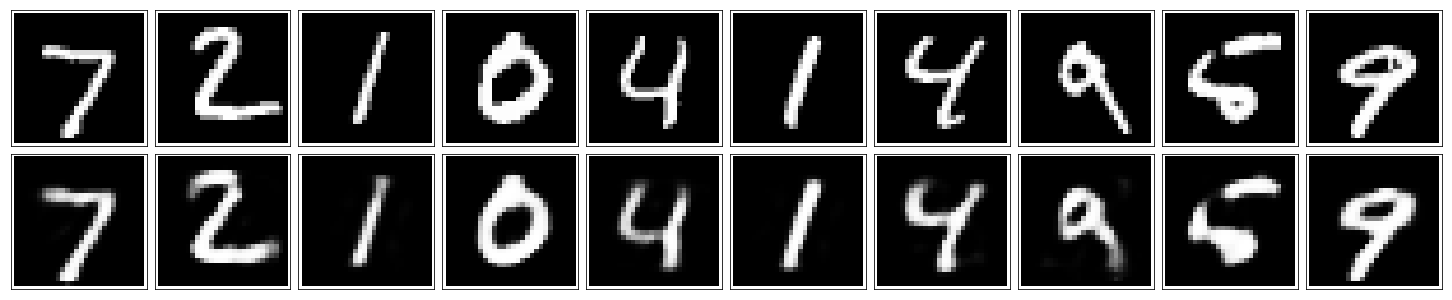

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [21]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.